# Causal Dynamic Network Analysis of fMRI

## Background
Inferring causal networks was a challenging problem in fMRI analysis. Existing methods, such as DCM (Friston et al, 2003), usually employ hypothesis-driven approaches for model the causal mechanisms from fMRI data. Such methods tend to scalable upto small networks with a few nodes.

We developed a machine learning method for inferring causal connections and activations from fMRI. This method is applicable for inferring large networks from both task-related or resting-state fMRI. The first paper is published in Frontiers in Neuroscience at https://www.frontiersin.org/articles/10.3389/fnins.2019.00127/full.



## Install our packages CDN 

In [2]:
%%bash
pip install cdn-fmri 

### Alternative way to install from 

Download the packages by using git clone https://github.com/xuefeicao/cdn.git

```
python setup.py install
```

## Loading packages

In [3]:
#loading packages 
#sys.path.append('../..')
from cdn.cdn_analysis import cdn_multi_sub
from cdn.evaluation_1 import eva 
import time
from six.moves import cPickle as pkl 
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Simulation Example

In this example, we apply our method to a simulated fMRI data from 10 subjects. The dataset was saved in the folder **data**.

The true network consists of 10 nodes, usually beyond the computational limit of canonical DCM.

In [36]:
# n is the number of subjects, running time around 1min
n = 10
folder_name = []
data_file = []
for i in range(n):
    folder = 'Analysis/' + str(i) + '/'
    folder_name.append(folder)
    folder = 'data/fMRI_' + str(i) + '.txt'
    data_file.append(folder)

real_parameter_file = 'data/real.pkl' # dict for real para
stimuli_folder = ['data/stimuli/']*n # This folder only contains evt files
dt = 0.72 #TR of fMRI
with open(real_parameter_file, "rb") as f:
    realpara = pkl.load(f,encoding="latin1")

## Real parameters used for simulations

In [37]:
# Effective connectivity A
print(realpara["A_real"])
realpara["A_real"].shape

[[ 0.          0.32883513  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-0.32883513  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.20969432  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.         -0.20969432  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.24479709
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -0.24479709  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.3216183   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.3216183   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.   

(10, 10)

In [38]:
# Task activation C
realpara["C_real"]

array([[0.51962213],
       [0.45572192],
       [0.52306573],
       [0.57438459],
       [0.42578552],
       [0.4865187 ],
       [0.5484643 ],
       [0.44284199],
       [0.4389129 ],
       [0.4358015 ]])

In [39]:
# Task specific connectivity B
realpara["B_real"]

array([[[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [-0.17512662],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.20724023],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [-0.24576952]],

       [[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [-0.21087986]],

       [[ 0.17512662],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.22189737]],

       [[ 0.        ],
        [-0.20724023],
        [ 0.        ],
   

## Fit CDN

In [40]:
t = time.time()
cdn_multi_sub(folder_name, data_file, stimuli_folder, val_pair=(0,1), dt=dt, lam=[0.1,0.01,1,10,50,100], mu=[0], lam_1=[0], tol=1e-2, max_iter=100, N=50, fold=0.5, share_stimuli=True, num_cores=1)
print('takes:', time.time()-t, 's')

selected tuning para: (10, 0, 0)
takes: 22.415430784225464 s


## CDN fits saved in the following folder

In [41]:
folder_name

['Analysis/0/',
 'Analysis/1/',
 'Analysis/2/',
 'Analysis/3/',
 'Analysis/4/',
 'Analysis/5/',
 'Analysis/6/',
 'Analysis/7/',
 'Analysis/8/',
 'Analysis/9/']

## Take subject 0 as an example

In [44]:
with open(folder_name[1]+'results/result.pkl', 'rb') as f:
    cdnEst = pkl.load(f, encoding='latin1')

In [45]:
cdnEst['A']

array([[-6.18172368e-03,  3.27751288e-01, -1.03216952e-02,
        -3.75912294e-03, -7.07489710e-04, -2.59367846e-04,
        -1.34653323e-02,  2.04046592e-02, -8.89100011e-03,
        -2.41953507e-02],
       [-2.86290999e-01, -1.71608572e-02, -1.07726067e-02,
        -2.65421560e-03,  4.98611756e-03,  6.63314672e-03,
         2.51191103e-02, -7.75661359e-03,  1.49718356e-02,
        -2.26291142e-02],
       [ 2.27307636e-03,  3.92804086e-03, -8.38623836e-03,
         1.94682671e-01,  2.63876507e-02, -8.94779155e-03,
        -7.20975507e-03,  1.80636476e-02,  2.32180845e-04,
        -2.87910688e-02],
       [ 7.44492602e-03, -3.72139617e-04, -1.83296716e-01,
        -3.05726263e-02,  1.35385438e-02, -2.95539952e-03,
        -5.54534504e-03, -1.73776009e-03,  1.78939677e-03,
        -1.14434538e-02],
       [-6.87239936e-03,  2.78868456e-04, -3.87419427e-02,
        -2.21080261e-02,  2.15260585e-03,  2.13798289e-01,
         7.59226310e-04,  2.84586509e-02,  1.91154539e-02,
         4.

In [75]:
cdnEst

{'A': array([[-6.18172368e-03,  3.27751288e-01, -1.03216952e-02,
         -3.75912294e-03, -7.07489710e-04, -2.59367846e-04,
         -1.34653323e-02,  2.04046592e-02, -8.89100011e-03,
         -2.41953507e-02],
        [-2.86290999e-01, -1.71608572e-02, -1.07726067e-02,
         -2.65421560e-03,  4.98611756e-03,  6.63314672e-03,
          2.51191103e-02, -7.75661359e-03,  1.49718356e-02,
         -2.26291142e-02],
        [ 2.27307636e-03,  3.92804086e-03, -8.38623836e-03,
          1.94682671e-01,  2.63876507e-02, -8.94779155e-03,
         -7.20975507e-03,  1.80636476e-02,  2.32180845e-04,
         -2.87910688e-02],
        [ 7.44492602e-03, -3.72139617e-04, -1.83296716e-01,
         -3.05726263e-02,  1.35385438e-02, -2.95539952e-03,
         -5.54534504e-03, -1.73776009e-03,  1.78939677e-03,
         -1.14434538e-02],
        [-6.87239936e-03,  2.78868456e-04, -3.87419427e-02,
         -2.21080261e-02,  2.15260585e-03,  2.13798289e-01,
          7.59226310e-04,  2.84586509e-02,  1.9

## Comparing with the ground-truth

### Causal connectivity

Text(0.5, 1.0, 'Cor/Func Connectivity')

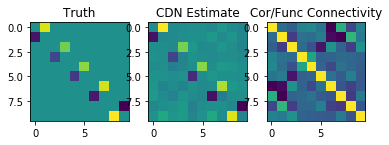

In [80]:
plt.figure()
ax = plt.subplot(131)
plt.imshow(realpara['A_real'])
ax.set_title("Truth")
ax = plt.subplot(132)
plt.imshow(cdnEst['A'])
ax.set_title("CDN Estimate")
ycor = np.corrcoef(cdnEst['y'])
ax = plt.subplot(133)
plt.imshow(ycor)
ax.set_title("Cor/Func Connectivity")

### Task activation

Text(0.5, 1.0, 'CDN Estimate')

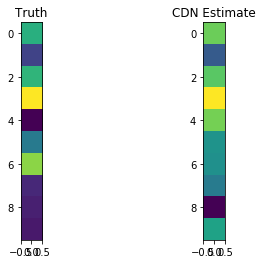

In [47]:
plt.figure()
ax = plt.subplot(121)
plt.imshow(realpara['C_real'])
ax.set_title("Truth")
ax = plt.subplot(122)
plt.imshow(cdnEst['C'])
ax.set_title("CDN Estimate")

### Task-specific connectivity
For one subject, the estimate is a bit noisy as expected.

Text(0.5, 1.0, 'CDN Estimate')

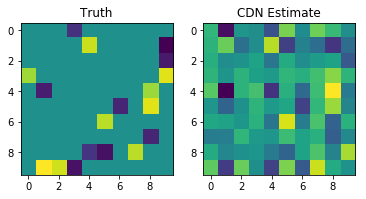

In [49]:
cdnEst_B = np.array(cdnEst['B'])[:,:,0]
real_B = np.array( realpara['B_real'] )[:,:,0]
plt.figure()
ax = plt.subplot(121)
plt.imshow(real_B)
ax.set_title("Truth")
ax = plt.subplot(122)
plt.imshow(cdnEst_B)
ax.set_title("CDN Estimate")

## Overall averaged over 10 subjects

In [52]:
alist = list()
for i in range(10):
    with open(folder_name[i]+'results/result.pkl', 'rb') as f:
        cdnesti = pkl.load(f, encoding='latin1')
        alist.append(cdnesti['A'])
        

Text(0.5, 1.0, 'CDN Average Estimate')

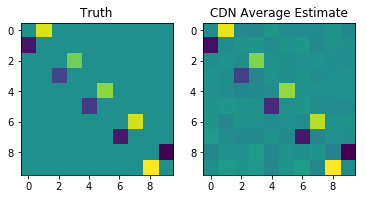

In [62]:
aavg = np.mean(np.array(alist), axis=0)
plt.figure()
ax = plt.subplot(121)
plt.imshow(realpara['A_real'])
ax.set_title("Truth")
ax = plt.subplot(122)
plt.imshow(aavg)
ax.set_title("CDN Average Estimate")

AUC= 1.0


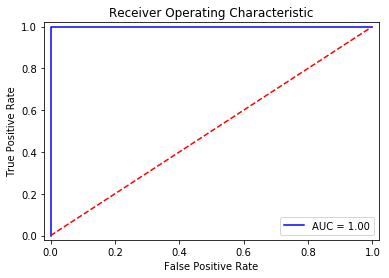

In [72]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(abs(realpara['A_real'].reshape(-1))>0, abs(aavg.reshape(-1)))
roc_auc = metrics.auc(fpr, tpr)
print("AUC=", roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The AUC of our CDN method is 1! This shows that CDN accurately recovered the causal networks.

# Real Data Example

We apply our method to analyze a block-design fMRI dataset from the Human Connectome Project (HCP). The task is a language processing task developed by Binder et al. (2011). The scan session interleaves 4 blocks of a story task and 4 blocks of a math task. The length of each block varies with an average of approximately 30 s, and the lengths of the story task and math task are roughly matched. The story task asks the participants to classify the topic of the story as revenge or reciprocity for example, after they hear a brief (around 5–9 sentences) story adapted from Aesop's fables, The math task requires the participants to do serial addition and subtraction calculations, and then choose the correct answer. These questions were generated from the same text-to-speech method used in the story task. The participants were then asked to press a button under the right index finger to select the first choice, or a button under the right middle finger to select the second choice. Details about the task design were described in Binder et al. (2011). The HCP task fMRI study, including the imaging protocol, was described in Barch et al. (2013). We analyze the data from 100 examplary subjects, and we follow the suggested HCP preprocessing pipeline (Glasser et al., 2013) to preprocess the data.

In [17]:
# n is the number of subjects, running time around 1min
t = time.time()
n = 100
folder_name = []
data_file = []

for i in range(n):
    folder = 'Analysis_real/' + str(i) + '/'
    folder_name.append(folder)
    folder = 'data_real/fMRI_' + str(i) + '.txt'
    data_file.append(folder)

real_parameter_file = 'data_real/real.pkl' # dict for real para
stimuli_folder = ['data_real/stimuli/']*n # This folder only contains evt files
dt = 0.72 #TR of fMRI 

In [18]:
cdn_multi_sub(folder_name, data_file, stimuli_folder, val_pair=(0,1), dt=dt, lam=[0.1,0.01,1,10,50,100], mu=[0], lam_1=[0], tol=1e-2, max_iter=100, N=50, fold=0.5, share_stimuli=True, num_cores=1)
eva(folder_name, saved_folder_name='')
print('takes:', time.time()-t, 's')


selected tuning para: (10, 0, 0)
takes: 42.600724935531616 s


In [19]:
with open('Analysis_real/0/results/result.pkl', 'rb') as f:
    data = pkl.load(f)
    

## Compare real and fitted BOLD time-series

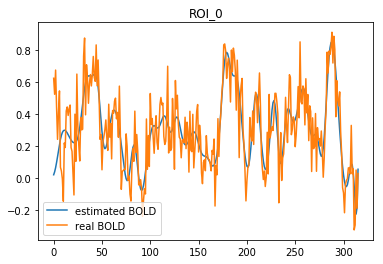

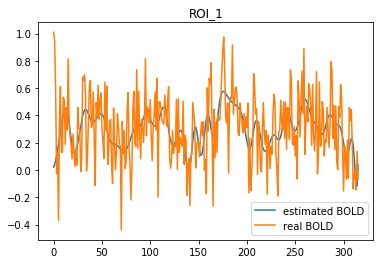

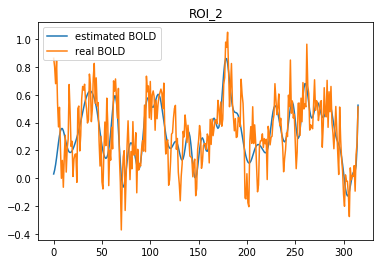

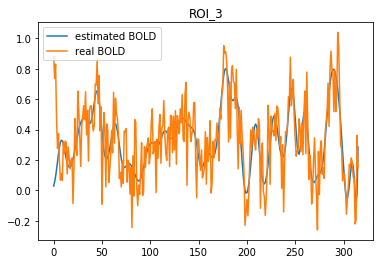

In [20]:
for i in range(4):
    plt.figure()
    plt.plot(data['estimated_y'][i,:], label='estimated BOLD')
    plt.plot(data['y'][i,:], label='real BOLD')
    plt.legend()
    plt.title('ROI_'+str(i))

## Recovered Network

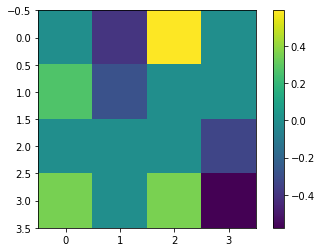

In [102]:
estA =  data['A'].copy()
adjA =  abs(estA) < np.median(abs(estA))
estA[adjA] = 0
plt.figure()
plt.imshow(estA)
plt.colorbar()